In [1]:
import MDAnalysis as mda

/home/aabettan/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
from membrane_curvature.base import MembraneCurvature

MDAnalysis  : INFO     MDAnalysis 2.6.1 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 2.6.1 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 2.6.1 STARTED logging to 'MDAnalysis.log'


In [7]:
import os
%%bash
 

In [17]:
from MDAnalysis import transformations

In [14]:
cd /data3/amiel/notebooks

/data3/amiel/notebooks


In [127]:
pwd

'/data3/amiel/P454/martini2/2_peptides/POPC_POPS'

In [3]:
u=mda.Universe('prod2P454.tpr','prod2P454centrot.xtc')

MDAnalysis.topology.TPRparser: INFO     Gromacs version   : b'VERSION 2020.7'
MDAnalysis.topology.TPRparser: INFO     Gromacs version   : b'VERSION 2020.7'
MDAnalysis.topology.TPRparser: INFO     tpx version       : 119
MDAnalysis.topology.TPRparser: INFO     tpx version       : 119
MDAnalysis.topology.TPRparser: INFO     tpx generation    : 27
MDAnalysis.topology.TPRparser: INFO     tpx generation    : 27
MDAnalysis.topology.TPRparser: INFO     tpx precision     : 4
MDAnalysis.topology.TPRparser: INFO     tpx precision     : 4
MDAnalysis.topology.TPRparser: INFO     tpx file_tag      : b'release'
MDAnalysis.topology.TPRparser: INFO     tpx file_tag      : b'release'
MDAnalysis.topology.TPRparser: INFO     tpx natoms        : 14438
MDAnalysis.topology.TPRparser: INFO     tpx natoms        : 14438
MDAnalysis.topology.TPRparser: INFO     tpx ngtc          : 1
MDAnalysis.topology.TPRparser: INFO     tpx ngtc          : 1
MDAnalysis.topology.TPRparser: INFO     tpx fep_state     : 0
MDAnal

In [15]:
w=mda.Universe('prod6667W.tpr','prod6667W.xtc')

MDAnalysis.topology.TPRparser: INFO     Gromacs version   : b'VERSION 2020.7'
MDAnalysis.topology.TPRparser: INFO     Gromacs version   : b'VERSION 2020.7'
MDAnalysis.topology.TPRparser: INFO     tpx version       : 119
MDAnalysis.topology.TPRparser: INFO     tpx version       : 119
MDAnalysis.topology.TPRparser: INFO     tpx generation    : 27
MDAnalysis.topology.TPRparser: INFO     tpx generation    : 27
MDAnalysis.topology.TPRparser: INFO     tpx precision     : 4
MDAnalysis.topology.TPRparser: INFO     tpx precision     : 4
MDAnalysis.topology.TPRparser: INFO     tpx file_tag      : b'release'
MDAnalysis.topology.TPRparser: INFO     tpx file_tag      : b'release'
MDAnalysis.topology.TPRparser: INFO     tpx natoms        : 14425
MDAnalysis.topology.TPRparser: INFO     tpx natoms        : 14425
MDAnalysis.topology.TPRparser: INFO     tpx ngtc          : 1
MDAnalysis.topology.TPRparser: INFO     tpx ngtc          : 1
MDAnalysis.topology.TPRparser: INFO     tpx fep_state     : 0
MDAnal

In [105]:
prot=u.residues[:31]
prot

<ResidueGroup with 31 residues>

In [120]:
prot=u.select_atoms('resid 1-31')
prot

<AtomGroup with 59 atoms>

In [100]:
print(protein.select_atoms('name BB'))


<AtomGroup [<Atom 1: BB of type B of resname ALA, resid 1 and segid SYSTEM>, <Atom 2: BB of type B of resname SER, resid 2 and segid SYSTEM>, <Atom 4: BB of type B of resname ALA, resid 3 and segid SYSTEM>, ..., <Atom 108: BB of type B of resname ILE, resid 57 and segid SYSTEM>, <Atom 110: BB of type B of resname ALA, resid 58 and segid SYSTEM>, <Atom 111: BB of type B of resname LEU, resid 59 and segid SYSTEM>]>


In [121]:
ref= u.select_atoms('resid 1-31 and name BB')
ref

<AtomGroup with 31 atoms>

In [124]:

workflow_fit = (transformations.center_in_box(prot, center='mass'),
                transformations.fit_rot_trans(prot, prot, plane='xy'))

u.trajectory.add_transformations(*workflow_fit)

In [4]:
print("Universe info:")
print("\nBox dimensions[x,y,z]: {}." \
      "".format(u.dimensions[:3]))

print("\n{} lipid residues and {} beads." \
      "".format(u.residues.n_residues, u.residues.n_atoms))

print("\nLipid types: ")
[print("-"+lipid) for lipid in set(u.residues.resnames)]

print("\nThe trajectory includes {} frames."\
      "".format(u.trajectory.n_frames))

Universe info:

Box dimensions[x,y,z]: [120.29225 120.29225 112.95345].

9454 lipid residues and 14438 beads.

Lipid types: 
-GLY
-SER
-LEU
-POPS
-ILE
-VAL
-ALA
-THR
-HIS
-GLN
-ION
-MET
-ARG
-POPC
-TRP
-W

The trajectory includes 8822 frames.


In [5]:
import nglview as nv
import numpy as np
def color_by_resname(system, zoom, color_, box=False):


    view = nv.show_mdanalysis(system)
    #view.add_representation('ball+stick', selection='not CHOL', radius=0.5, color="grey")
    view.add_representation('ball+stick', selection='.PO4', radius=2.00, color=color_)
    #view.add_representation('ball+stick', selection='not POPC and not POPS', radius=0.5, color="yellow")
    #view.add_representation('ball+stick', selection='POPS', radius=2.00, color="orange")
    #view.add_representation('ball+stick', selection='POPC', radius=2.00, color="brown")
    if box == True:
        view.add_unitcell()

    view.camera='orthographic'
    view.control.zoom(zoom)
    view.control.rotate(
         mda.lib.transformations.quaternion_from_euler(
             -np.pi/2, np.pi/3, np.pi/12, 'rzyz').tolist())


    return view

In [6]:
color_by_resname(u, 0.5, "brown")

NGLWidget(max_frame=8821)

In [20]:
from MDAnalysis.analysis.leaflet import LeafletFinder
L=LeafletFinder(u,'name PO4')
up_leaflet=L.groups(0)
low_leaflet=L.groups(1)

In [18]:
from MDAnalysis.analysis.leaflet import LeafletFinder
l=LeafletFinder(w,'name PO4')
up_leaf=l.groups(0)
low_leaf=l.groups(1)

In [21]:
list_leaflets = [up_leaflet.residues.resids,
                     low_leaflet.residues.resids]

In [24]:
list_leaf = [up_leaf.residues.resids,
                     low_leaf.residues.resids]

In [22]:
leaflets=["Lower","Upper"]

for name, lf in zip(leaflets,list_leaflets):
    print("{} leaflet includes resid {}-{} "  \
          "and a total of {} elements.".format(name,
                                               lf[0],
                                               lf[-1],
                                               len(lf)))

Lower leaflet includes resid 63-287 and a total of 225 elements.
Upper leaflet includes resid 288-510 and a total of 223 elements.


In [25]:
leaflets=["Lower","Upper"]

for name, lf in zip(leaflets,list_leaf):
    print("{} leaflet includes resid {}-{} "  \
          "and a total of {} elements.".format(name,
                                               lf[0],
                                               lf[-1],
                                               len(lf)))

Lower leaflet includes resid 61-285 and a total of 225 elements.
Upper leaflet includes resid 286-510 and a total of 225 elements.


In [11]:
mc_upper = MembraneCurvature(u, 
                             select="resid 32-256 and name PO4",
                             n_x_bins=12, 
                             n_y_bins=12,wrap=False).run()

mc_lower = MembraneCurvature(u, 
                             select='resid 257-479 and name PO4', 
                             n_x_bins=12, 
                             n_y_bins=12,wrap=False).run()

/softwares/Anaconda3/2023.07/lib/python3.11/site-packages/membrane_curvature/base.py:161: UserWarning:  `wrap == False` may result in inaccurate calculation of membrane curvature. Surfaces will be derived from a reduced number of atoms. 
  Ignore this warning if your trajectory has  rotational/translational fit rotations! 
  warnings.warn(msg)
MDAnalysis.MDAKit.membrane_curvature: WARNING   `wrap == False` may result in inaccurate calculation of membrane curvature. Surfaces will be derived from a reduced number of atoms. 
  Ignore this warning if your trajectory has  rotational/translational fit rotations! 
MDAnalysis.MDAKit.membrane_curvature: WARNING   `wrap == False` may result in inaccurate calculation of membrane curvature. Surfaces will be derived from a reduced number of atoms. 
  Ignore this warning if your trajectory has  rotational/translational fit rotations! 
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to 

In [26]:
mc_upper = MembraneCurvature(w, 
                             select="resid 32-256 and name PO4",
                             n_x_bins=12, 
                             n_y_bins=12,wrap=False).run()

mc_lower = MembraneCurvature(w, 
                             select='resid 257-479 and name PO4', 
                             n_x_bins=12, 
                             n_y_bins=12,wrap=False).run()

/softwares/Anaconda3/2023.07/lib/python3.11/site-packages/membrane_curvature/base.py:161: UserWarning:  `wrap == False` may result in inaccurate calculation of membrane curvature. Surfaces will be derived from a reduced number of atoms. 
  Ignore this warning if your trajectory has  rotational/translational fit rotations! 
  warnings.warn(msg)
MDAnalysis.MDAKit.membrane_curvature: WARNING   `wrap == False` may result in inaccurate calculation of membrane curvature. Surfaces will be derived from a reduced number of atoms. 
  Ignore this warning if your trajectory has  rotational/translational fit rotations! 
MDAnalysis.MDAKit.membrane_curvature: WARNING   `wrap == False` may result in inaccurate calculation of membrane curvature. Surfaces will be derived from a reduced number of atoms. 
  Ignore this warning if your trajectory has  rotational/translational fit rotations! 
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to 

KeyboardInterrupt: 

In [12]:
mean_upper_leaflet = mc_upper.results.average_mean

mean_lower_leaflet = mc_lower.results.average_mean

In [ ]:
mean_upper_leaf = mc_upper.results.average_mean

mean_lower_leaf = mc_lower.results.average_mean

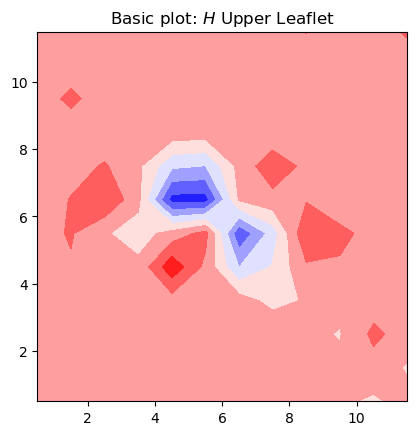

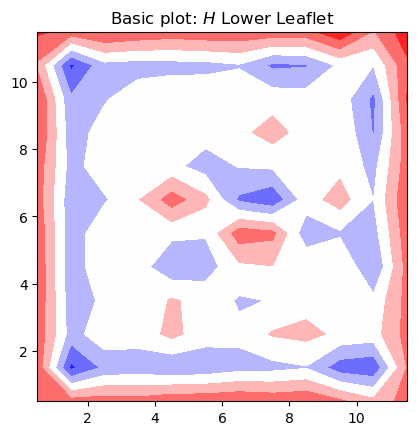

In [13]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1)
# plot contour with transposed arrays and set the origin to [0,0] using origin=lower
ax.contourf(mean_upper_leaflet.T, cmap='bwr', origin='lower')
ax.set_aspect('equal')
ax.set_title('Basic plot: $H$ Upper Leaflet')
plt.show();
fig, ax = plt.subplots(1,1)
# plot contour with transposed arrays and set the origin to [0,0] using origin=lower
ax.contourf(mean_lower_leaflet.T, cmap='bwr', origin='lower')
ax.set_aspect('equal')
ax.set_title('Basic plot: $H$ Lower Leaflet')
plt.show()


In [14]:
curvature_upper_leaflet.results.average_z_surface

NameError: name 'curvature_upper_leaflet' is not defined

In [15]:
gaussian_upper_leaflet = mc_upper.results.average_gaussian
gaussian_lower_leaflet = mc_lower.results.average_gaussian

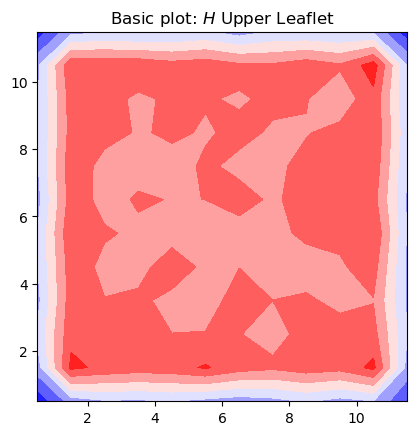

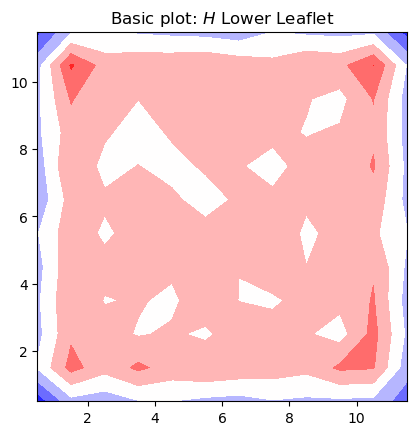

In [16]:
fig, ax = plt.subplots(1,1)
# plot contour with transposed arrays and set the origin to [0,0] using origin=lower
ax.contourf(gaussian_upper_leaflet.T, cmap='bwr', origin='lower')
ax.set_aspect('equal')
ax.set_title('Basic plot: $H$ Upper Leaflet')
plt.show();
fig, ax = plt.subplots(1,1)
# plot contour with transposed arrays and set the origin to [0,0] using origin=lower
ax.contourf(gaussian_lower_leaflet.T, cmap='bwr', origin='lower')
ax.set_aspect('equal')
ax.set_title('Basic plot: $H$ Lower Leaflet')
plt.show()

NameError: name 'im' is not defined

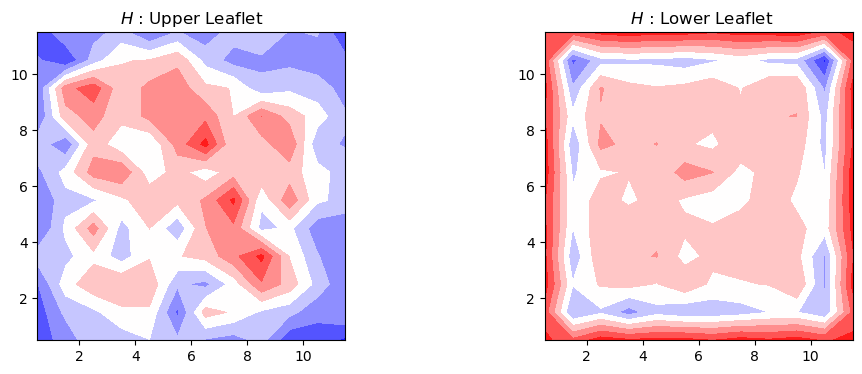

In [17]:
import matplotlib.pyplot as plt

# Créer une figure avec 1 ligne et 2 colonnes pour les deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tracé pour le premier graphique (gauche)
ax1.contourf(mean_upper_leaflet.T, cmap='bwr', origin='lower')
ax1.set_aspect('equal')
ax1.set_title('$H$ : Upper Leaflet')

# Tracé pour le deuxième graphique (droite)
ax2.contourf(mean_lower_leaflet.T, cmap='bwr', origin='lower')
ax2.set_aspect('equal')
ax2.set_title(' $H$ : Lower Leaflet')

# Afficher la figure avec les deux sous-graphiques côte à côte
cbar = plt.colorbar(im, ticks=tcs, orientation='horizontal', ax=ax, shrink=0.7, aspect=10, pad=0.05)
cbar.ax.tick_params(labelsize=6, width=0.5)
cbar.set_label(label, fontsize=8, labelpad=2)
 
max_ = np.max(abs(results[0]))
max_abs = np.max(np.abs(rs))
im = ax.contourf(rs.T, cmap='viridis', origin='lower', levels=levs, alpha=0.95, vmin=-max_abs, vmax=max_abs)
cbar = plt.colorbar(im, ticks=tcs, orientation='horizontal', ax=ax, shrink=0.7, aspect=10, pad=0.05)

    
plt.tight_layout()
plt.show()


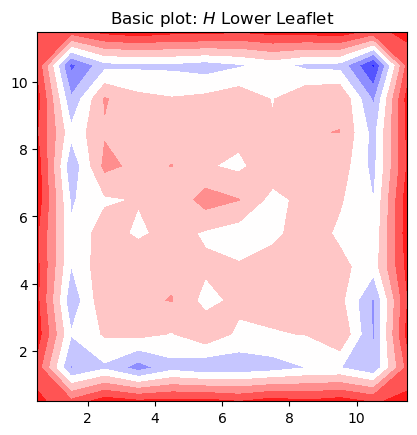

In [18]:
fig, ax = plt.subplots(1,1)
# plot contour with transposed arrays and set the origin to [0,0] using origin=lower
ax.contourf(mean_lower_leaflet.T, cmap='bwr', origin='lower')
ax.set_aspect('equal')
ax.set_title('Basic plot: $H$ Lower Leaflet')
plt.show()

In [19]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

def plot_contours(results, label, levels_, cm):
    """
    Function used to plot contours of MembraneCurvature results.
    User can determine the number of contour lines / regions (levels),
    label of the colorbar (label), and colormap (cmap).

    Parameters
    ----------
    results: list
        List with results by leaflets as elements [lower_leaflet, upper_leaflet]
    label: str
        Label to add to the colorbar.
    levels: int
        Determines the number of contour lines.
    cmap: str
        Colormap to use in the plot.

    """
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(8, 4), dpi=200)
    
    for ax, rs, lf in zip((ax1, ax2), results, ["Lower Leaflet", "Upper Leaflet"]):
        max_abs = np.max(np.abs(rs))
        
        # Calculate contour levels based on the maximum absolute value
        #levs = np.linspace(-max_abs, max_abs, levels_)
        
        im = ax.contourf(rs.T, cmap='coolwarm', origin='lower',  alpha=0.95, vmin=-max_abs, vmax=max_abs)
        
        tcs = [-max_abs, 0, max_abs]
        
        ax.set_aspect('equal')
        ax.set_title(f'{lf}', fontsize=8)
        ax.axis('off')
        
        cbar = plt.colorbar(im, ticks=tcs, orientation='horizontal', ax=ax, shrink=0.7, aspect=10, pad=0.05)
        cbar.ax.tick_params(labelsize=6, width=0.5)
        cbar.set_label(label, fontsize=8, labelpad=2)
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
# plot_contours(mean_curvs, "$H$ ($\AA^{-1}$)", 100, "viridis")


In [20]:
mean_curvs = [mean_lower_leaflet, mean_upper_leaflet]

In [21]:
from PIL import Image

In [ ]:
from PIL import Image
plot_contours(mean_curvs, "$H$ ($\AA^{-1}$)", 30, "bwr")
#plt.savefig('temp.png')
#img = Image.open('temp.png')

    # Enregistrez l'image sous un autre nom de fichier (ou format) si nécessaire
#img.save('C:/Users/amiel/OneDrive/Bureau/mebrane_cur_P454_PCPS.png')

In [22]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

def plot_contours(results, label, levels_, cm):
    """
    Function used to plot contours of MembraneCurvature results.
    User can determine the number of contour lines / regions (levels),
    label of the colorbar (label), and colormap (cmap).

    Parameters
    ----------
    results: list
        List with results by leaflets as elements [lower_leaflet, upper_leaflet]
    label: str
        Label to add to the colorbar.
    levels: int
        Determines the number of contour lines.
    cmap: str
        Colormap to use in the plot.

    """
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(8, 4), dpi=200)
    
    for ax, rs, lf in zip((ax1, ax2), results, ["Lower Leaflet", "Upper Leaflet"]):
        max_abs = np.max(np.abs(rs))
        
        # Calculate contour levels based on the maximum absolute value
        levs = np.linspace(-max_abs, max_abs, levels_)
        
        im = ax.contourf(rs.T, cmap=cm, origin='lower', levels=levs, alpha=0.95, vmin=-max_abs, vmax=max_abs)
        
        tcs = [-max_abs, 0, max_abs]
        
        ax.set_aspect('equal')
        ax.set_title(f'{lf}', fontsize=8)
        ax.axis('off')
        
        # Ajustez ici les couleurs de la colormap pour améliorer le contraste
        # Exemple : changer la colormap en 'viridis'
        # im = ax.contourf(rs.T, cmap='viridis', origin='lower', levels=levs, alpha=0.95, vmin=-max_abs, vmax=max_abs)
        
        cbar = plt.colorbar(im, ticks=tcs, orientation='horizontal', ax=ax, shrink=0.7, aspect=10, pad=0.05)
        cbar.ax.tick_params(labelsize=6, width=0.5)
        cbar.set_label(label, fontsize=8, labelpad=2)
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
# plot_contours(mean_curvs, "$H$ ($\AA^{-1}$)", 50, "bwr")


In [ ]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

def plot_contours(results, label, levels_, cm):
    """
    Function used to plot contours of MembraneCurvature results.
    User can determine the number of contour lines / regions (levels),
    label of the colorbar (label), and colormap (cmap).

    Parameters
    ----------
    results: list
        List with results by leaflets as elements [lower_leaflet, upper_leaflet]
    label: str
        Label to add to the colorbar.
    levels: int
        Determines the number of contour lines.
    cmap: str
        Colormap to use in the plot.

    """
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(8, 4), dpi=200)
    
    for ax, rs, lf in zip((ax1, ax2), results, ["Lower Leaflet", "Upper Leaflet"]):
        max_abs = np.max(np.abs(rs))
        
        # Calculate contour levels based on the maximum absolute value
        levs = np.linspace(-max_abs, max_abs, levels_)
        
        im = ax.contourf(rs.T, cmap=cm, origin='lower', levels=levs, alpha=0.95, vmin=-max_abs, vmax=max_abs)
        
        tcs = [-max_abs, 0, max_abs]
        
        ax.set_aspect('equal')
        ax.set_title(f'{lf}', fontsize=8)
        ax.axis('off')
        
        cbar = plt.colorbar(im, ticks=tcs, orientation='horizontal', ax=ax, shrink=0.7, aspect=10, pad=0.05)
        cbar.ax.tick_params(labelsize=6, width=0.5)
        cbar.set_label(label, fontsize=8, labelpad=2)
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
# plot_contours(mean_curvs, "$H$ ($\AA^{-1}$)", 50, "bwr")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np



label = "$H$ ($\AA^{-1}$)"
levels_ = 50
cm = 'bwr'

# Créez une figure avec une rangée et un nombre de colonnes égal au nombre de tableaux
num_plots = len(mean_curvs)
fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

for i in range(num_plots):
    ax = axes[i]
    rs = mean_curvs[i]

    # Calcul des niveaux de contour avec un ordre croissant
    min_val = np.min(rs)
    max_val = np.max(rs)
    levs = np.linspace(min_val, max_val, levels_)

    # Tracé du contour avec les niveaux triés
    im = ax.contourf(rs.T, cmap=cm, origin='lower', levels=levs, alpha=0.95, vmin=min_val, vmax=max_val)
    tcs = [min_val, max_val]

    # Titre pour chaque sous-graphique
    ax.set_aspect('equal')
    ax.set_title(f'Plot {i + 1}: {label}')

# Afficher la figure avec les sous-graphiques côte à côte
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vos données


label = "$H$ ($\AA^{-1}$)"
levels_ = 50
cm = 'bwr'

# Créez une figure avec une rangée et un nombre de colonnes égal au nombre de tableaux
num_plots = len(mean_curvs)
fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

for i in range(num_plots):
    ax = axes[i]
    rs = mean_curvs[i]

    # Calcul des niveaux de contour avec un ordre croissant
    min_val = np.min(rs)
    max_val = np.max(rs)
    levs = np.linspace(min_val, max_val, levels_)

    # Tracé du contour avec les niveaux triés
    im = ax.contourf(rs.T, cmap=cm, origin='lower', levels=levs, alpha=0.95, vmin=min_val, vmax=max_val)
    tcs = [min_val, max_val]

    # Titre pour chaque sous-graphique
    ax.set_aspect('equal')
    ax.set_title(f'Plot {i + 1}: {label}')

    # Ajouter des axes
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

# Afficher la figure avec les sous-graphiques côte à côte
plt.tight_layout()
plt.show()


In [ ]:
# surface
surf_upper = mc_upper.results.average_z_surface
surf_lower = mc_lower.results.average_z_surface

# mean curvature
mean_upper = mc_upper.results.average_mean
mean_lower = mc_lower.results.average_mean

# Gaussian curvature
gauss_upper = mc_upper.results.average_gaussian
gauss_lower = mc_lower.results.average_gaussian

In [23]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

results = [mean_lower, mean_upper]
leaflets = ["Lower", "Upper"]

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(4,3.5))
#max_ = max([np.max(abs(h)) for h in results])

for ax, rs, lf in zip((ax1, ax2), results, leaflets):
    rs = ndimage.zoom(rs, 4, mode='wrap', order=1)
    levs = np.linspace(-max_, max_, 40)
    im = ax.contourf(rs, cmap='bwr', 
                     origin='lower', levels=levs,
                     #vmin=-max_, vmax=max_)

    ax.set_aspect('equal')
    ax.set_title('{} Leaflet'.format(lf), fontsize=6)
    ax.axis('off')

cbar = plt.colorbar(im, ticks=[-max_, 0, max_], 
                    orientation='vertical', 
                    ax=[ax1, ax2], shrink=0.4, 
                    aspect=10, pad=0.05)
cbar.ax.tick_params(labelsize=4, width=0.5)
cbar.set_label('H (nm$^{-1}$)', fontsize=6, labelpad=2)

SyntaxError: positional argument follows keyword argument (3634680517.py, line 19)